In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
import math
import time
from tabulate import tabulate
import ipywidgets as widgets

In [3]:
#Some data collection for 
headerJ = ["set", "1 run", "Animation Time", "Frame"] #This is the header for the julia set
headerM = ["set", "1 run"] #This is the header for the mandelbrot set

In [4]:
k_julia_data = ["Julia (Compiler Type)"] #Initialize the data for the julia set
def kenny_julia(i, arr):
    start = time.time() #Start timing
    N = 100 #this is the number of subdivisions on either axis
    x = np.arange(-2, 2 + (4/N), 4/N) #Create the points along the x axis
    y = np.arange(-2, 2 + (4/N), 4/N) #Create the points along the y axis

    it = 10 #Total iterations to compare with

    mag = list() #This will hold the hold the individual rows of the image

    #Iterate the y axis
    for b in y:
        mag.append(list()) #This is an individual row in the imge
        #Iterate the y axis
        for a in x:
            #The constant is e^ia, where a is between [0, 2PI]
            cy = 0.7885*math.sin(i) #imaginary component of the complex constant
            cx = 0.7885*math.cos(i) #real component of the complex number
            zx = a #real component of the table
            zy = b #imaginary component of the table
            n = 0 
            while n < it:
                nx = (zx**2) - (zy**2) + cx #z^2 --> real number + real component of the constant
                ny = (2 * zy * zx) + cy #the first degree of the z^2 operation --> imaginary number + imaginary component of the constant
                #Compare with threshold
                if (nx**2) + (ny**2) > 5:
                    mag[-1].append(n) #append the number of iterations to create a gradient effect 
                    break #break if found

                #This will iterate each individual point of the x and y axis until the iteration is met, or it converges
                zy = ny #Create a new imaginary component
                zx = nx #Create a new real component
                n+=1

            if n == it:
                mag[-1].append(it)#This is a point that diverges

    end = time.time() #End Timing
    
    #This conditional just determins what to add to the data array, and when to add it
    if(len(arr) == 1 or len(arr) == 2):
        arr.append((end-start))
        if(len(arr) == 3):
            arr.append(0) #This will cound the frames
    else:
        #This else statement accounts for the animation, and just adds the time it takes for each frame, as well as the total frames counted
        arr[-2] += (end-start)
        arr[-1] += 1
        
    return mag #Return the 2D array, which represents the image

<IPython.core.display.Javascript object>


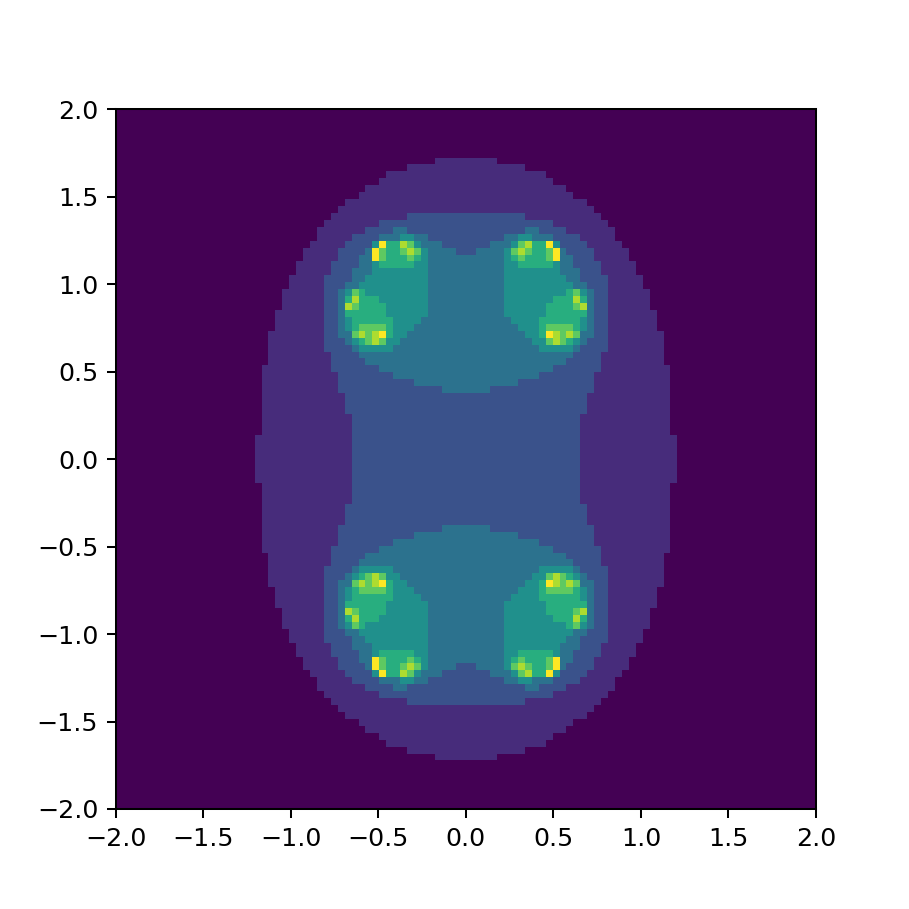

In [5]:
#Setup here
fig, ax = plt.subplots() #divide the plot into the figures and axes

#Set the figure dimentions (how large the graph will appear)
fig.set_figwidth(5) 
fig.set_figheight(5)

#Set the axes dimensions
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

#Show the final image that is calculated
mag = kenny_julia(0, k_julia_data)
plt.imshow(mag, extent=[-2, 2, -2, 2])
plt.show()

<IPython.core.display.Javascript object>


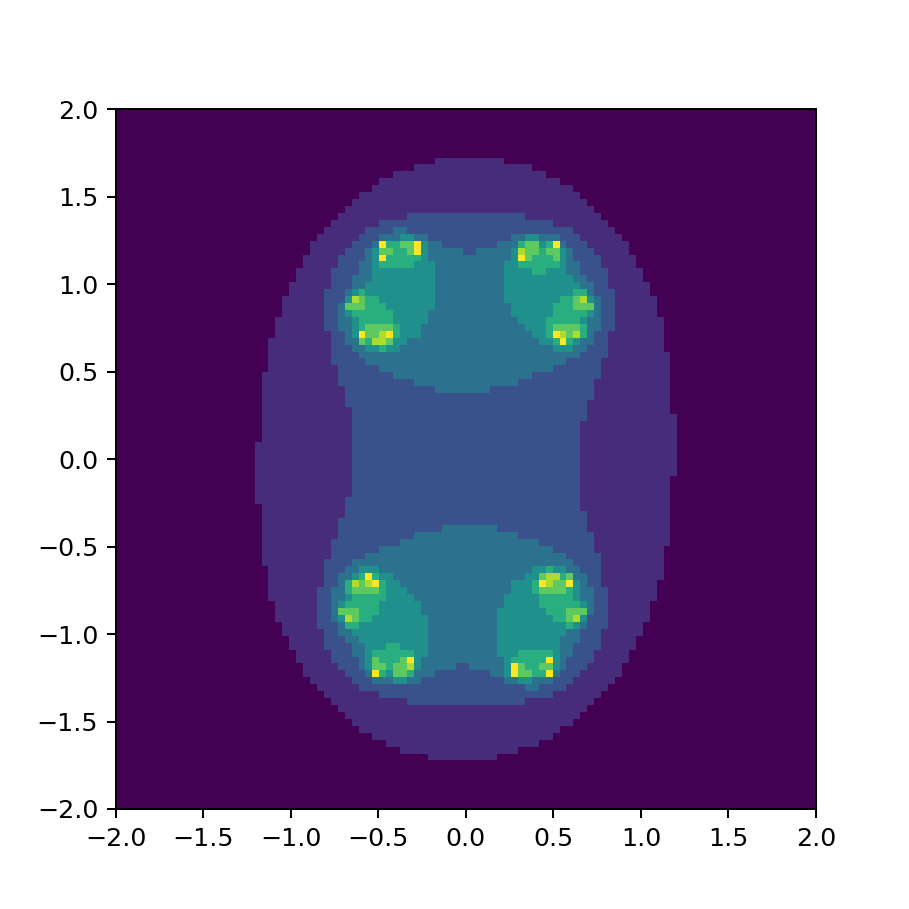

In [6]:
#This will be the animation for the julia set about the a's between [0, 2PI] 
#for the constant c=e^(ia)
plt.close()

#get the figure again, and set it's dimensions
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(5)

#Get the axes again, and set it's dimentions
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))

#This is just a setup image, so that the graph actually has something when initialized
setup = kenny_julia(0, k_julia_data)
im = plt.imshow(setup, extent=[-2, 2, -2, 2]) #This variable represents the plot, which will be used for the aninmation

#this will initialize the animation, again, just repeating, the setup image
def init():
    img = kenny_julia(0, k_julia_data)
    im.set_data(img)
    return [im] #return the 2D representation of the julia set

#This is the animation function, each frame represents an iteration in the [0, 2PI] range
def animate(frame):
    img = kenny_julia(frame, k_julia_data)
    im.set_array(img) #Reset the array that represents the image
    return [im] #Return that new plot

#This varaible holds the animation, and can be used to save to an actual file
anim = FuncAnimation(fig, animate, frames=np.linspace(0, 2*math.pi, 100), init_func=init, blit=True)

#Show the plot
plt.show()


<IPython.core.display.Javascript object>


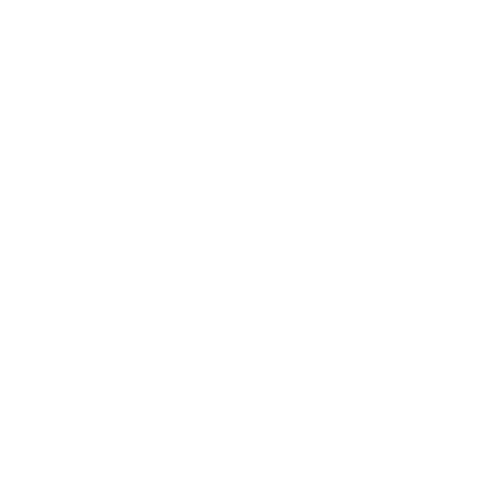

In [7]:
#This will average the time need to animate the frames in the animation
k_julia_data[-2] = k_julia_data[-2] / k_julia_data[-1]
plt.close() #Close the plot so that the other animations can actually begin

#This is Markiece's Code for the julia set

#This is the julia set code
m_julia_set = ["Julia (Scripting Type)"] #Setup his data array
def julia(z, a):
    MAX_VALUE = 5 #Establish how many iterations
    z = complex(*z) #Create the complex conjugate of the parameter
    n = 0 #Iterations
    c = complex(0.7885*math.cos(a), 0.7885*math.sin(a)) #Complex constant
    
    #This will loop will determine what points converge and diverge
    while (abs(z) <= 2) and (n < MAX_VALUE):
        z = z**2 + c
        n += 1
        
    return n #Return that number, whether the individual point converges or diverges

def markiece_julia(i, arr):
    res = 100 #How many points inbetween the start and finish
    
    #Range for both x and y
    x_min, x_max = -2, 2 
    y_min, y_max = -2, 2
    
    #Create a 2D array that represents the individual points
    x0, y0 = np.meshgrid(np.linspace(x_min, x_max, res), np.linspace(y_min, y_max, res))
    
    #This flattens both the x and y arrays, and make them into a list of complex numbers
    values = np.c_[x0.ravel(),y0.ravel()]
    
    
    start = time.time() #Start time
    
    #Being graphing the julia set
    mandelbrot = [julia(c, i) for c in values]
    mandelbrot = np.array(mandelbrot).reshape(100,100) #reshape continous results
    
    
    end = time.time() #end time
    
    #This conditional just determins what to add to the data array, and when to add it
    if(len(arr) == 1 or len(arr) == 2):
        arr.append((end-start))
        if(len(arr) == 3):
            arr.append(0) #This will cound the frames
    else:
        #This else statement accounts for the animation, and just adds the time it takes for each frame, as well as the total frames counted
        arr[-2] += (end-start)
        arr[-1] += 1
        
    return mandelbrot #return imate

man = markiece_julia(0, m_julia_set) #Call the graphing function

#Show figure
plt.figure(figsize=(5, 5))
plt.imshow(man)
plt.show()


<IPython.core.display.Javascript object>


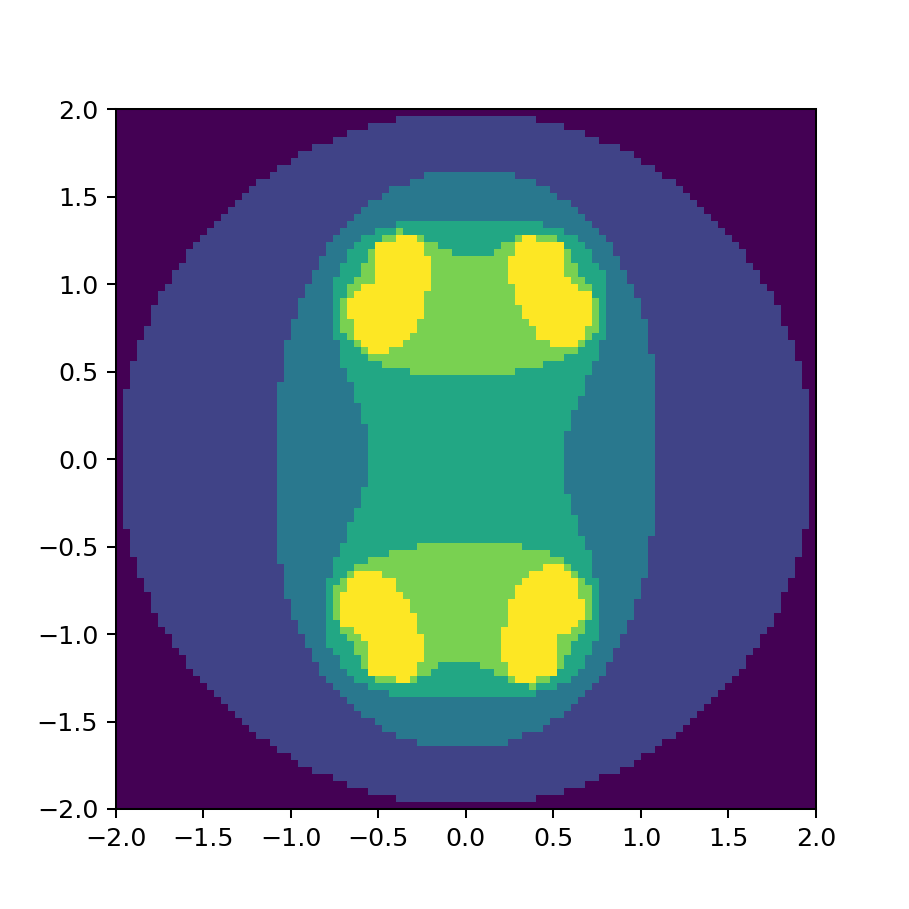

In [8]:
#This will be the animation for the julia set about the a's between [0, 2PI] 
#for the constant c=e^(ia)

#get the figure again, and set it's dimensions
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(5)

#Get the axes again, and set it's dimentions
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))

#This is just a setup image, so that the graph actually has something when initialized
setup = markiece_julia(0, m_julia_set)
im = plt.imshow(setup, extent=[-2, 2, -2, 2]) #This variable represents the plot, which will be used for the aninmation

#this will initialize the animation, again, just repeating, the setup image
def init():
    im.set_data(markiece_julia(0, m_julia_set))
    return [im] #return the 2D representation of the julia set

#This is the animation function, each frame represents an iteration in the [0, 2PI] range
def animate(frame):
    img = markiece_julia(frame, m_julia_set)
    im.set_array(img) #Reset the array that represents the image
    return [im] #Return that new plot

#This varaible holds the animation, and can be used to save to an actual file
anim = FuncAnimation(fig, animate, frames=np.linspace(0, 2*math.pi, 100), init_func=init, blit=True)

#Show the plot
plt.show()

In [9]:
m_julia_set[-2] = m_julia_set[-2] / m_julia_set[-1] #average markiece's data
plt.close() #Close that plot

#This is the mandelbrot stuff, we each did it differently, but we essentially get the same results
def kenny_mandel(image, x1, x2, y1, y2): 
    fig = plt.gcf() #Get the current figure
    
    #Set the dimensions
    fig.set_figheight(5)
    fig.set_figwidth(5)
    
    #Get the current axis
    ax = plt.gca()

    ax.imshow(image, extent=[x1, x2, y1, y2]) #Graph the mandelbrot here
    
    #This links the click event to a function
    cid = fig.canvas.mpl_connect('button_press_event', lambda event: onclick(event, x1, x2, y1, y2, ax, fig))
    
    plt.show() #Show the plot
    
    
#Mandelbrot calculations, I seperated this from the graphing because of the click functionality I added later
def calculation(x1, x2, y1, y2, xr, yr, arr, T, N=400):
    start = time.time()
    #Setup x and y data
    x = np.arange(x1, x2, xr)
    y = np.arange(y1, y2, yr)

    #Total number of iterations
    it = 100

    #Establish the image 2-D array
    mag = list()

    for b in y:
        mag.append(list()) #Add a row
        for a in x:
            #This program runs on the idea of just working with the individual components of the complex number
            #This is the constant, which is set to each individual x and y component
            cy = b
            cx = a
            
            #This is the z, which is 0 in every iteration of the mandelbrot set
            zx = 0
            zy = 0
            
            #This while loop will determine convergence, or divergence
            n = 0
            while n < it:
                nx = (zx**2) - (zy**2) + cx #X-Component
                ny = (2 * zy * zx) + cy #Y-Component
                
                #The threshold of convergence is 50
                if (nx**2) + (ny**2) > 50:
                    mag[-1].append(n)  #Append that iteration, and then break
                    break
                    
                #Establish new z
                zx = nx
                zy = ny
                n += 1

            #This determines divergence
            if n == it:
                mag[-1].append(it)

    #Return image and points
    end=time.time()
    if T:
        arr.append((end-start))
    return mag, x1, x2, y1, y2


In [10]:
#this is a basic mandelbrot graph and example
#Establish range
x1 = -2
x2 = 2
y1 = -2
y2 = 2

#Establish iterations
N = 400

#Establish the rate of points in each axis
xr = (x2 - x1) / N
yr = (y2 - y1) / N

#Perform calculations and then graph
k_mandel = ["Mandelbrot (Compiler Type)"]
mag, x, xf, y, yf =  calculation(x1, x2, y1, y2, xr, yr, k_mandel, True, N)
kenny_mandel(mag, x, xf, y, yf)

In [56]:
plt.close() #Close that plot

#This function will just run the click event
def onclick(event, xi, xf, yi, yf, ax, fig):
    
    #This ensures that it is only in the image area
    if event.xdata != None and event.ydata != None:
        
        #This will scale the current point and add a 1% value to the end of it, 
        #so you are essentially zooming into 1% of the image
        tempX1 = ((event.xdata + abs(xi)) / abs(xf - xi)) * 400
        tempX2 = (((event.xdata + abs(xi)) / abs(xf - xi)) * 400) + 4
        
        #Rescale back to original decimal range
        x1 = (tempX1 * 0.01) - abs(xi)
        x2 = (tempX2 * 0.01) - abs(xi)

        #Establish new rate
        xr = abs(x2 - x1) / N

        #This will scale the current point and add a 1% value to the end of it, 
        #so you are essentially zooming into 1% of the image
        tempY1 = (((event.ydata + abs(yi)) / abs(yf - yi)) * 400)
        tempY2 = (((event.ydata + abs(yi)) / abs(yf - yi)) * 400) + 4

        #Rescale back to original decimal range
        y1 = (tempY1 * 0.01) - abs(yi)
        y2 = (tempY2 * 0.01) - abs(yi)

        #Establish new rate
        yr = abs(y2 - y1) / N
        
        #Recalculate image
        mag, xi1, xf1, yi1, yf1 = calculation(x1, x2, y1, y2, xr, yr, list(), False, 400)
        
        #Update axis and redraw figure
        ax.imshow(mag, extent=[xi1, xf1, yi1, yf1])
        fig.canvas.draw_idle()
        


In [57]:
#this is a basic mandelbrot graph and example
#Establish range
x1 = -2
x2 = 2
y1 = -2
y2 = 2

#Establish iterations
N = 400

#Establish the rate of points in each axis
xr = (x2 - x1) / N
yr = (y2 - y1) / N

#Perform calculations and then graph
mag, x, xf, y, yf =  calculation(x1, x2, y1, y2, xr, yr, list(), False, N)
kenny_mandel(mag, x, xf, y, yf)

In [85]:
#This is the zoom out button
#This function will zoom out to the original -2 2 range
button = widgets.Button(description="Zoom Out")
out = widgets.Output()
def button_click(x1, x2, y1, y2, ax, fig, dif):
        with out:
            if dif != -4:
                mag = graph(x1, x2, y1, y2, False, list(), button, False)
                ax.imshow(mag, extent=[x1, x2, y1, y2])
                fig.canvas.draw_idle()
            else:
                print("Won't zoom out, your are at the limit")
    

<IPython.core.display.Javascript object>


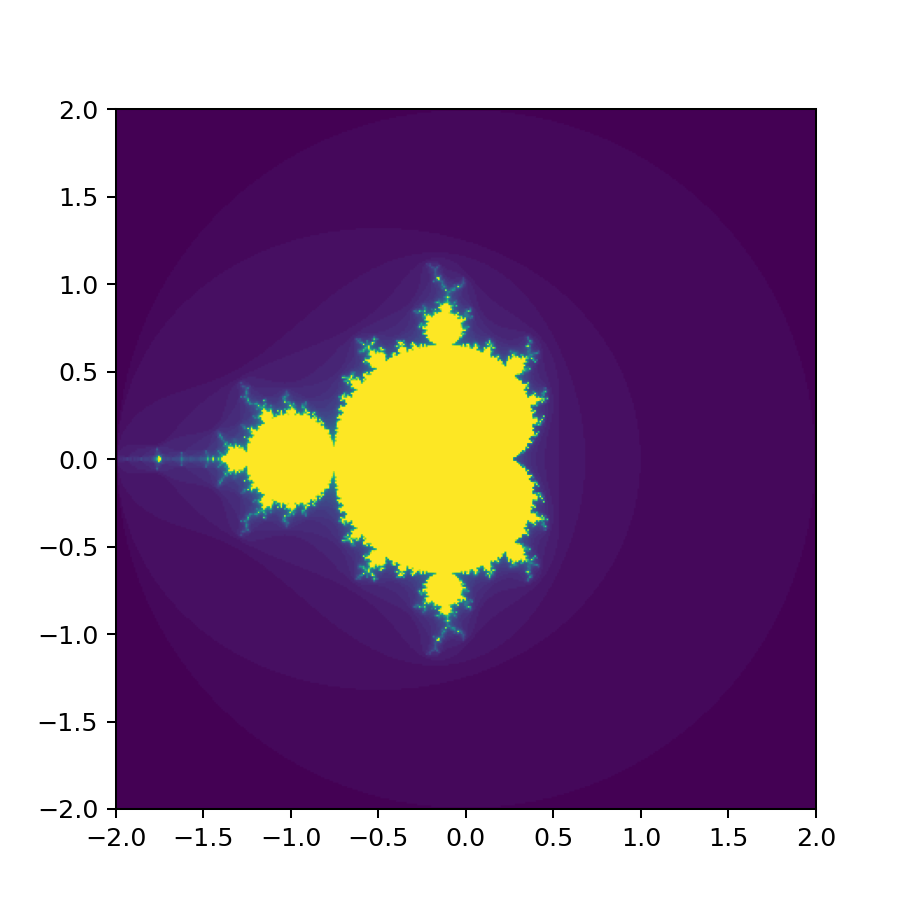

In [86]:
plt.close() #close the previous plot
#This is Markiece's Code

m_mandel = ["Mandelbrot (Scripting Type)"]

def mandel(c):
    MAX_VALUE = 50 #Number of iterations
    z = 0 #Z complex number is 0
    n = 0
    c = complex(*c) #Each point on the plot is a complex number now
    
    #Determine which point's converge or diverge
    while (abs(z) <= 2) and (n < MAX_VALUE):
        z = z**2 + c
        n += 1
    return n #Return the iterations that determine convergence or divergence

def graph(x1, x2, y1, y2, T, arr, button, g=True):
    res = 400
    x_min, x_max = x1, x2
    y_min, y_max = y1, y2
    x0, y0 = np.meshgrid(np.linspace(x_min, x_max, res), np.linspace(y_min, y_max, res))
    values = np.c_[x0.ravel(),y0.ravel()]
    
    #Time the mandelbrot set
    start = time.time()
    mandelbrot = [mandel(c) for c in values] #Perform the check on each complex number
    mandelbrot = np.array(mandelbrot).reshape(400,400) #Reshape the flattenend array
    end = time.time()
    
    #Add the time to the data array
    if T:
        arr.append((end-start))
    
    #Set up the figure and axes
    fig, ax = plt.subplots()
    
    #Dimensions of figure
    fig.set_figheight(5)
    fig.set_figwidth(5)
    
    cid = fig.canvas.mpl_connect('button_press_event', lambda event: newclick(event, x1, x2, y1, y2, ax, fig, button))
    #This conditionals determines whether to just graph the mandelbrot set, or return the image, which is needed
    #for the click function
    if g:
        ax.imshow(mandelbrot, extent=[-2, 2, -2, 2])
        plt.show()
    else:
        return mandelbrot
    
#Graph the mandelbrot set
graph(-2, 2, -2, 2, True, m_mandel, button)

In [87]:
def newclick(event, xi, xf, yi, yf, ax, fig, button):
    #only occur when inside figure
    if event.xdata != None and event.ydata != None:
        #This will scale the current point and add a 1% value to the end of it, 
        #so you are essentially zooming into 1% of the image
        tempX1 = ((event.xdata + abs(xi)) / abs(xf - xi)) * 400
        tempX2 = (((event.xdata + abs(xi)) / abs(xf - xi)) * 400) + 4
        
        #Rescale to decimal range
        x1 = (tempX1 * 0.01) - abs(xi)
        x2 = (tempX2 * 0.01) - abs(xi)

        #This will scale the current point and add a 1% value to the end of it, 
        #so you are essentially zooming into 1% of the image
        tempY1 = (((event.ydata + abs(yi)) / abs(yf - yi)) * 400)
        tempY2 = (((event.ydata + abs(yi)) / abs(yf - yi)) * 400) + 4

        #Rescale to decimal range
        y1 = (tempY1 * 0.01) - abs(yi)
        y2 = (tempY2 * 0.01) - abs(yi)

        #Regraph the mandelbrot
        mag = graph(x1, x2, y1, y2, False, list(), button, False)
        ax.imshow(mag, extent=[x1, x2, y1, y2]) #Update the axes
        fig.canvas.draw_idle() #Redraw the figure
        
        button._click_handlers.callbacks = [] #This resets the callback
        button.on_click(lambda _ : button_click(xi, xf, yi, yf, ax, fig, (abs(x1 - x2))))

<IPython.core.display.Javascript object>


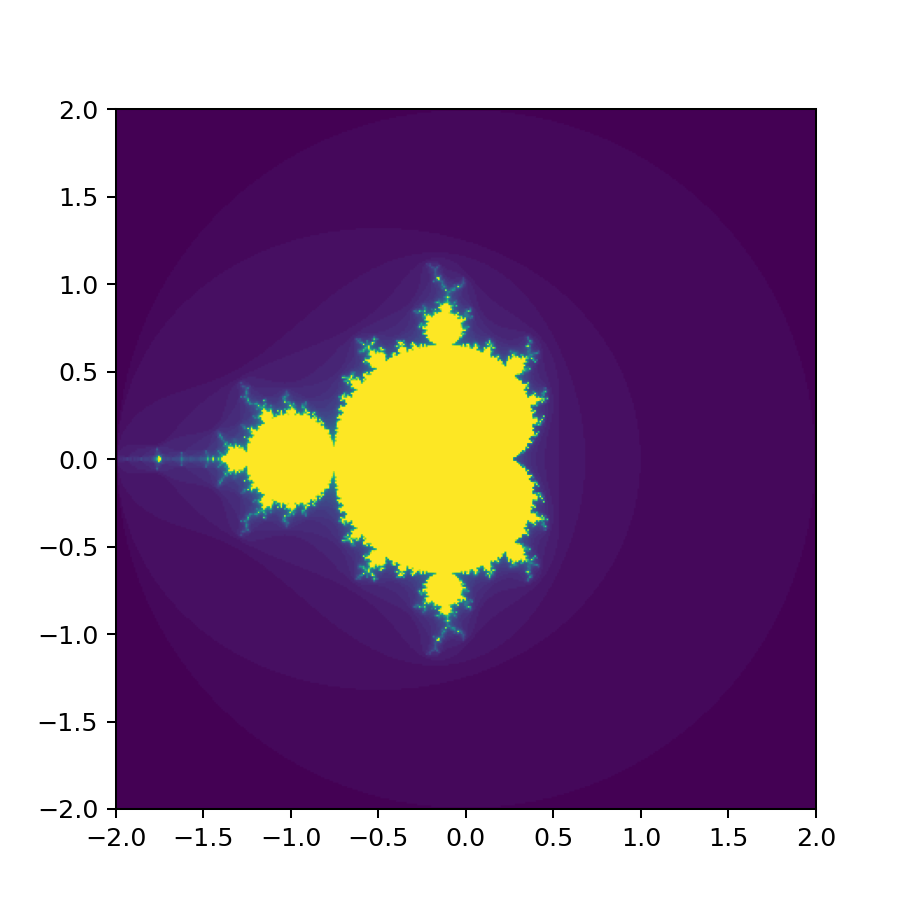

In [88]:
#Regraph the mandelbrot set now
graph(-2, 2, -2, 2, False, list(), button)
widgets.VBox([button, out])

In [24]:
#This is the data analysis part for the mandelbrot set
data = list()
data.append(k_mandel)
data.append(m_mandel)
print(tabulate(data, headers=headerM, tablefmt="grid"))

+-----------------------------+----------+
| set                         |    1 run |
+=============================+==========+
| Mandelbrot (Compiler Type)  | 4.35333  |
+-----------------------------+----------+
| Mandelbrot (Scripting Type) | 0.394511 |
+-----------------------------+----------+


In [55]:
#This is the data analysis part for the julia set
data = list()
data.append(k_julia_data)

#Normalize the data
k_julia_data[2] = (k_julia_data[2] * 100.0) / float(k_julia_data[3])
k_julia_data[3] = 100

data.append(m_julia_set)

#Normalize the data
m_julia_set[2] = (m_julia_set[2] * 100.0) / float(m_julia_set[3])
m_julia_set[3] = 100

print(tabulate(data, headers=headerJ, tablefmt="grid"))

+------------------------+-----------+------------------+---------+
| set                    |     1 run |   Animation Time |   Frame |
+========================+===========+==================+=========+
| Julia (Compiler Type)  | 0.0498309 |         2.10803  |     100 |
+------------------------+-----------+------------------+---------+
| Julia (Scripting Type) | 0.0168269 |         0.865719 |     100 |
+------------------------+-----------+------------------+---------+
